# Data Mining Project Deliverables
# Part 2: Data Analysis

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

## 1. Importing Data

In [19]:
project_df = pd.read_csv("projectdata.csv")

In [20]:
project_df.columns

Index(['AGE', 'EDUCATION_NUM', 'HOURS_PER_WEEK', 'INCOME_2024',
       'WORKCLASS_Federal-gov', 'WORKCLASS_Local-gov',
       'WORKCLASS_Never-worked', 'WORKCLASS_Private', 'WORKCLASS_Self-emp-inc',
       'WORKCLASS_Self-emp-not-inc', 'WORKCLASS_State-gov',
       'WORKCLASS_Without-pay', 'MARITAL_STATUS_Divorced',
       'MARITAL_STATUS_Married-AF-spouse', 'MARITAL_STATUS_Married-civ-spouse',
       'MARITAL_STATUS_Married-spouse-absent', 'MARITAL_STATUS_Never-married',
       'MARITAL_STATUS_Separated', 'MARITAL_STATUS_Widowed', 'SEX_Female',
       'SEX_Male', 'RACE_Amer-Indian-Eskimo', 'RACE_Asian-Pac-Islander',
       'RACE_Black', 'RACE_Other', 'RACE_White', 'EDUCATION_10th',
       'EDUCATION_11th', 'EDUCATION_12th', 'EDUCATION_1st-4th',
       'EDUCATION_5th-6th', 'EDUCATION_7th-8th', 'EDUCATION_9th',
       'EDUCATION_Assoc-acdm', 'EDUCATION_Assoc-voc', 'EDUCATION_Bachelors',
       'EDUCATION_Doctorate', 'EDUCATION_HS-grad', 'EDUCATION_Masters',
       'EDUCATION_Preschool',

In [21]:
project_df.head(10)

,AGE,EDUCATION_NUM,HOURS_PER_WEEK,INCOME_2024,WORKCLASS_Federal-gov,WORKCLASS_Local-gov,WORKCLASS_Never-worked,WORKCLASS_Private,WORKCLASS_Self-emp-inc,WORKCLASS_Self-emp-not-inc,...,EDUCATION_9th,EDUCATION_Assoc-acdm,EDUCATION_Assoc-voc,EDUCATION_Bachelors,EDUCATION_Doctorate,EDUCATION_HS-grad,EDUCATION_Masters,EDUCATION_Preschool,EDUCATION_Prof-school,EDUCATION_Some-college
0,39,13,40,<=124K,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,50,13,13,<=124K,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,38,9,40,<=124K,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,53,7,40,<=124K,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,28,13,40,<=124K,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
5,37,14,40,<=124K,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
6,49,5,16,<=124K,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
7,52,9,45,>124K,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
8,31,14,50,>124K,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
9,42,13,40,>124K,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


Convert Income Category to Binary 

In [22]:
project_df['INCOME_2024'] = ['0' if value == '<=124K' else '1' for value in project_df['INCOME_2024']]

In [23]:
project_df.head(10)

,AGE,EDUCATION_NUM,HOURS_PER_WEEK,INCOME_2024,WORKCLASS_Federal-gov,WORKCLASS_Local-gov,WORKCLASS_Never-worked,WORKCLASS_Private,WORKCLASS_Self-emp-inc,WORKCLASS_Self-emp-not-inc,...,EDUCATION_9th,EDUCATION_Assoc-acdm,EDUCATION_Assoc-voc,EDUCATION_Bachelors,EDUCATION_Doctorate,EDUCATION_HS-grad,EDUCATION_Masters,EDUCATION_Preschool,EDUCATION_Prof-school,EDUCATION_Some-college
0,39,13,40,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,50,13,13,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,38,9,40,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,53,7,40,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,28,13,40,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
5,37,14,40,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
6,49,5,16,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
7,52,9,45,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
8,31,14,50,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
9,42,13,40,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [24]:
project_df['INCOME_2024'].unique()

array(['0', '1'], dtype=object)

In [25]:
project_df['INCOME_2024'] = project_df['INCOME_2024'].astype('category')

In [26]:
project_df['INCOME_2024'].unique()

['0', '1']
Categories (2, object): ['0', '1']

## 2. Create Training and Testing Sets for Model Evaluation

In [27]:
X=project_df.drop('INCOME_2024', axis=1)  #Features
y=project_df['INCOME_2024']  #target variable

#Splitting data into training (60%) and testing (40%) sets for model validation.
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

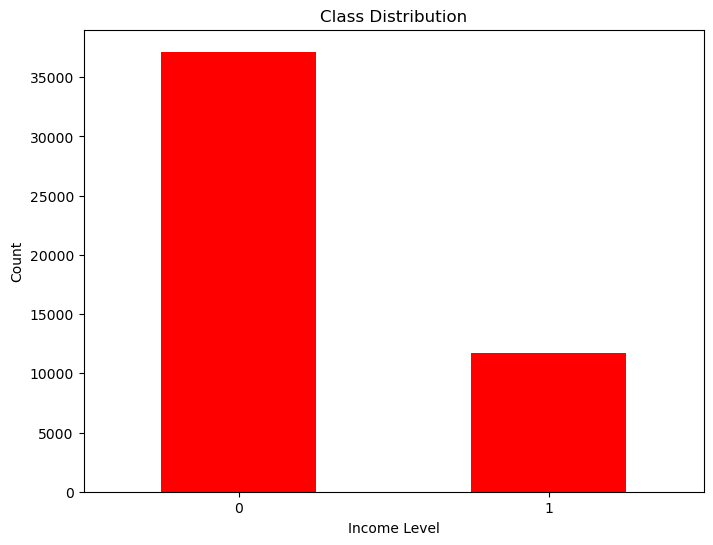

0    37155
1    11687
Name: INCOME_2024, dtype: int64


In [28]:
class_dist= project_df['INCOME_2024'].value_counts()

# Plot for class distribution
plt.figure(figsize=(8, 6))
class_dist.plot(kind='bar', color='red')
plt.title('Class Distribution')
plt.xlabel('Income Level')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()
# Print class counts
print(class_dist)

In [29]:
# Create an instance of the SMOTE class
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

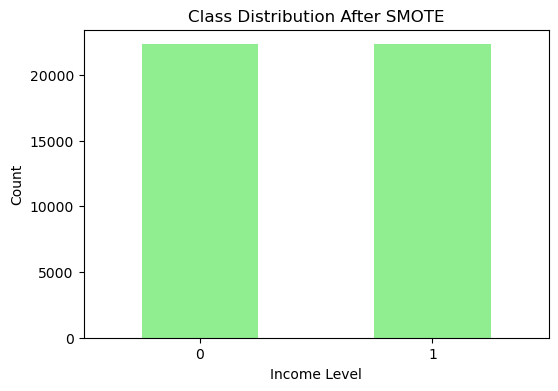

0    22329
1    22329
Name: INCOME_2024, dtype: int64


In [30]:
class_distribution_resampled = y_train_res.value_counts()

# Plot the class distribution after SMOTE
plt.figure(figsize=(6, 4))
class_distribution_resampled.plot(kind='bar', color='lightgreen')
plt.title('Class Distribution After SMOTE')
plt.xlabel('Income Level')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Print class counts after SMOTE
print(class_distribution_resampled)

In [31]:
numerical_cols =['AGE','HOURS_PER_WEEK']

In [32]:
scaler= StandardScaler()

# Fit and transform the scaler on the numerical columns of X_train
X_train_res[numerical_cols] = scaler.fit_transform(X_train_res[numerical_cols])

# Transform the numerical columns of X_test using the same scaler
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

## 3. Model selection

### 3.1 Logistic Regression

In [33]:
logist_out = LogisticRegression()
logist_out.fit(X_train_res, y_train_res)

LogisticRegression()

In [34]:
# Assuming 'project_df' is the original DataFrame and 'INCOME_2024' is the target
categorical_cols = [col for col in project_df.columns if project_df[col].dtype == 'object' and col != 'INCOME_2024']

# Apply one-hot encoding to the entire dataset (except the target)
X_encoded = pd.get_dummies(project_df.drop('INCOME_2024', axis=1), columns=categorical_cols)
y = project_df['INCOME_2024']

# Split the data after encoding
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.4, random_state=42)

In [35]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [36]:
from sklearn.linear_model import LogisticRegression

logist_out = LogisticRegression()
logist_out.fit(X_train_res, y_train_res)  # Training on the resampled dataset
y_pred_lr = logist_out.predict(X_test)  # Predicting the test dataset

In [37]:
print(X_train_res.columns)
print(X_test.columns)

Index(['AGE', 'EDUCATION_NUM', 'HOURS_PER_WEEK', 'WORKCLASS_Federal-gov',
       'WORKCLASS_Local-gov', 'WORKCLASS_Never-worked', 'WORKCLASS_Private',
       'WORKCLASS_Self-emp-inc', 'WORKCLASS_Self-emp-not-inc',
       'WORKCLASS_State-gov', 'WORKCLASS_Without-pay',
       'MARITAL_STATUS_Divorced', 'MARITAL_STATUS_Married-AF-spouse',
       'MARITAL_STATUS_Married-civ-spouse',
       'MARITAL_STATUS_Married-spouse-absent', 'MARITAL_STATUS_Never-married',
       'MARITAL_STATUS_Separated', 'MARITAL_STATUS_Widowed', 'SEX_Female',
       'SEX_Male', 'RACE_Amer-Indian-Eskimo', 'RACE_Asian-Pac-Islander',
       'RACE_Black', 'RACE_Other', 'RACE_White', 'EDUCATION_10th',
       'EDUCATION_11th', 'EDUCATION_12th', 'EDUCATION_1st-4th',
       'EDUCATION_5th-6th', 'EDUCATION_7th-8th', 'EDUCATION_9th',
       'EDUCATION_Assoc-acdm', 'EDUCATION_Assoc-voc', 'EDUCATION_Bachelors',
       'EDUCATION_Doctorate', 'EDUCATION_HS-grad', 'EDUCATION_Masters',
       'EDUCATION_Preschool', 'EDUCATION_Pro

In [38]:
project_df.columns
project_df.head(10)

,AGE,EDUCATION_NUM,HOURS_PER_WEEK,INCOME_2024,WORKCLASS_Federal-gov,WORKCLASS_Local-gov,WORKCLASS_Never-worked,WORKCLASS_Private,WORKCLASS_Self-emp-inc,WORKCLASS_Self-emp-not-inc,...,EDUCATION_9th,EDUCATION_Assoc-acdm,EDUCATION_Assoc-voc,EDUCATION_Bachelors,EDUCATION_Doctorate,EDUCATION_HS-grad,EDUCATION_Masters,EDUCATION_Preschool,EDUCATION_Prof-school,EDUCATION_Some-college
0,39,13,40,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,50,13,13,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,38,9,40,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,53,7,40,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,28,13,40,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
5,37,14,40,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
6,49,5,16,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
7,52,9,45,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
8,31,14,50,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
9,42,13,40,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [39]:
from sklearn.metrics import classification_report
accuracy_lr=accuracy_score(y_test,y_pred_lr)
#precision for pos__label'1'
precision_lr= precision_score(y_test, y_pred_lr, pos_label='1')
#recall for pos__label'1'
recall_lr=recall_score(y_test, y_pred_lr, pos_label='1')

#classification report
class_report=classification_report(y_test, y_pred_lr, target_names=['0','1'])
# F1 Score 
f1score_lr=f1_score(y_test, y_pred_lr, pos_label='1')

# ROC AUC Curve
roc_auc_lr=roc_auc_score(y_test, logist_out.predict_proba(X_test)[:,1])

print("Accuracy:", accuracy_lr)
print("Precision (pos_label='1'):", precision_lr)
print("Recall (pos_label='1'):", recall_lr)
print("F1 Score (pos_label='1'):", f1score_lr)
print("ROC AUC Score:", roc_auc_lr)
print("Classification Report:\n", class_report)

Accuracy: 0.7933664329221477
Precision (pos_label='1'): 0.5517029763731206
Recall (pos_label='1'): 0.7633198896200382
F1 Score (pos_label='1'): 0.6404844598806662
ROC AUC Score: 0.8672198865360792
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.80      0.86     14826
           1       0.55      0.76      0.64      4711

    accuracy                           0.79     19537
   macro avg       0.73      0.78      0.75     19537
weighted avg       0.83      0.79      0.80     19537



### 3.2 Random Forest Classifier

In [40]:
from sklearn.metrics import classification_report

In [41]:
# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=1)

# Fit the model to the training data
rf_classifier.fit(X_train_res, y_train_res)

# Make predictions on the test data
y_pred_rf = rf_classifier.predict(X_test)

# Convert predictions to string if y_test is string
y_pred_rf = y_pred_rf.astype(str)

# Calculate evaluation metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, pos_label='1')
recall_rf = recall_score(y_test, y_pred_rf, pos_label='1')
f1_rf = f1_score(y_test, y_pred_rf, pos_label='1')
roc_auc_rf = roc_auc_score(y_test, rf_classifier.predict_proba(X_test)[:, 1])

# Generate a classification report
classification_rep_rf = classification_report(y_test, y_pred_rf, target_names=['0', '1'])

# Print the evaluation metrics
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)
print("ROC AUC Score:", roc_auc_rf)
print("Classification Report:\n", classification_rep_rf)


Accuracy: 0.7925986589548037
Precision: 0.5597461468721668
Recall: 0.6552748885586924
F1 Score: 0.6037551339722277
ROC AUC Score: 0.841600054440324
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.84      0.86     14826
           1       0.56      0.66      0.60      4711

    accuracy                           0.79     19537
   macro avg       0.72      0.75      0.73     19537
weighted avg       0.81      0.79      0.80     19537



### 3.3 XGBoost

In [42]:
# Initialize a Label Encoder to transform categorical labels into integers
encoder = LabelEncoder()

# Transform the training and testing target labels into numerical format
numeric_y_train = encoder.fit_transform(y_train_res)
numeric_y_test = encoder.transform(y_test)

# Configure an XGBoost classifier with specific settings for binary classification
xgb_classifier = XGBClassifier(
    objective='binary:logistic',  # Specifies that the task is binary classification
    max_depth=3,                  # Sets the maximum depth of each tree in the model
    learning_rate=0.1,            # Controls the learning rate to enhance model performance
    n_estimators=100,             # Defines the number of gradient boosted trees to fit
    random_state=1                # Ensures consistent results across multiple runs
)

# Train the classifier on the transformed training data
xgb_classifier.fit(X_train_res, numeric_y_train)

# Predict the target labels for the test dataset
predictions_xgb = xgb_classifier.predict(X_test)

# Compute performance metrics for the model
accuracy_metric_xgb = accuracy_score(numeric_y_test, predictions_xgb)
precision_metric_xgb = precision_score(numeric_y_test, predictions_xgb)
recall_metric_xgb = recall_score(numeric_y_test, predictions_xgb)
f1_metric_xgb = f1_score(numeric_y_test, predictions_xgb)
roc_auc_metric_xgb = roc_auc_score(numeric_y_test, xgb_classifier.predict_proba(X_test)[:, 1])

# Output the computed metrics
print("Accuracy:", accuracy_metric_xgb)
print("Precision:", precision_metric_xgb)
print("Recall:", recall_metric_xgb)
print("F1 Score:", f1_metric_xgb)
print("ROC AUC Score:", roc_auc_metric_xgb)

# Create a detailed classification report
detailed_report_xgb = classification_report(numeric_y_test, predictions_xgb)
print("Detailed Classification Report:\n", detailed_report_xgb)

Accuracy: 0.7890157137738649
Precision: 0.5422464495768182
Recall: 0.8023774145616642
F1 Score: 0.6471494607087828
ROC AUC Score: 0.8800504732703077
Detailed Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.78      0.85     14826
           1       0.54      0.80      0.65      4711

    accuracy                           0.79     19537
   macro avg       0.73      0.79      0.75     19537
weighted avg       0.83      0.79      0.80     19537



In [43]:
# List classifier names and their corresponding evaluation metrics
classifier_labels = ["Logistic Regression", "Random Forest", "XGBoost"]
list_accuracies = [accuracy_lr, accuracy_rf, accuracy_metric_xgb]
list_precisions = [precision_lr, precision_rf, precision_metric_xgb]
list_recalls = [recall_lr, recall_rf, recall_metric_xgb]
list_f1_scores = [f1score_lr, f1_rf, f1_metric_xgb]
list_roc_aucs = [roc_auc_lr,  roc_auc_rf, roc_auc_metric_xgb]

# Organize these metrics into a DataFrame for clear comparison
performance_table = pd.DataFrame({
    "Model": classifier_labels,
    "Accuracy": list_accuracies,
    "Precision": list_precisions,
    "Recall": list_recalls,
    "F1 Score": list_f1_scores,
    "ROC AUC Score": list_roc_aucs
})

# Show the DataFrame to compare model performance
performance_table

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC Score
0,Logistic Regression,0.793366,0.551703,0.763320,0.640484,0.86722
1,Random Forest,0.792599,0.559746,0.655275,0.603755,0.84160
2,XGBoost,0.789016,0.542246,0.802377,0.647149,0.88005


## 4. Hyperparameter Tuning 

### 4.1 Hyperparameter tuning for Logistic Regression

In [44]:
#hyperparameters for Logistic Regression
log_reg_params = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
log_reg = LogisticRegression(solver='liblinear')

#parameters for random search
rand_param_dist = {'C': np.logspace(-3, 3, 10)}
random_cv = RandomizedSearchCV(log_reg, rand_param_dist, n_iter=5, cv=10, scoring='recall', random_state=1)
random_cv.fit(X_train_res, y_train_res)

# Retrieve optimal parameters from random search
optimal_rand_params = random_cv.best_params_

In [45]:
# Assuming X_train_res and y_train_res are defined and are your feature set and targets respectively
# Fit the RandomizedSearchCV object to the data
random_cv.fit(X_train_res, y_train_res)

# Retrieve optimal parameters from the random search
optimal_rand_params = random_cv.best_params_

# Print the best parameters found
print("Best parameters found: ", optimal_rand_params)

Best parameters found:  {'C': 0.021544346900318832}


In [46]:
grid_cv = GridSearchCV(log_reg, log_reg_params, cv=10, scoring='recall')
grid_cv.fit(X_train_res, y_train_res)

# Obtain best parameters from grid search
optimal_params = grid_cv.best_params_
optimal_log_reg = grid_cv.best_estimator_

In [47]:
predictions_Hlr = optimal_log_reg.predict(X_test)
predictions_Hlr = predictions_Hlr.astype(str)
accuracy_Hlr = accuracy_score(y_test, predictions_Hlr)
precision_Hlr = precision_score(y_test, predictions_Hlr, pos_label='1')
recall_Hlr = recall_score(y_test, predictions_Hlr, pos_label='1')
f1_Hlr = f1_score(y_test, predictions_Hlr, pos_label='1')
roc_auc_Hlr = roc_auc_score(y_test, optimal_log_reg.predict_proba(X_test)[:, 1])

# Print metrics
print("Accuracy:", accuracy_Hlr)
print("Precision:", precision_Hlr)
print("Recall:", recall_Hlr)
print("F1 Score:", f1_Hlr)
print("ROC AUC Score:", roc_auc_Hlr)
classification_report_Hlr = classification_report(y_test, predictions_Hlr, target_names=['0', '1'])
print("Classification Report:\n", classification_report_Hlr)

Accuracy: 0.7315862210165327
Precision: 0.46830776548935665
Recall: 0.8359159414137126
F1 Score: 0.6003048780487805
ROC AUC Score: 0.8564767993075438
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.70      0.80     14826
           1       0.47      0.84      0.60      4711

    accuracy                           0.73     19537
   macro avg       0.70      0.77      0.70     19537
weighted avg       0.82      0.73      0.75     19537



### 4.2 Hyperparameter tuning for Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

In [49]:
rf_params = {
    'n_estimators': [100, 200, 300],  # Even more reduced set
    'max_features': ['sqrt','log2'],
    'max_depth': [None, 10, 50],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 4],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier()

In [50]:
# Adjust n_jobs to use all cores, reduce n_iter, and decrease cv folds
random_rf_search = RandomizedSearchCV(
    rf, 
    rf_params, 
    n_iter=5,  # Further reduced iterations
    cv=3,  # Reduced CV folds
    scoring='recall', 
    random_state=1,
    n_jobs=-1  # Use all available cores
)

In [51]:
# Fit RandomizedSearchCV with a subset of the data for quick tuning
random_rf_search.fit(X_train_res, y_train_res)
best_rf_params = random_rf_search.best_params_
# Output best parameters
print("Best parameters found: ",best_rf_params)

Best parameters found:  {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': None, 'bootstrap': False}


In [52]:
refined_rf_params = {
    'n_estimators': [best_rf_params['n_estimators']],
    'max_features': [best_rf_params['max_features']],
    'max_depth': [best_rf_params['max_depth']],
    'min_samples_split': [best_rf_params['min_samples_split']],
    'min_samples_leaf': [best_rf_params['min_samples_leaf']],
    'bootstrap': [best_rf_params['bootstrap']]
}

In [53]:
# Reduced CV folds and limited parameter exploration
grid_Hrf_search = GridSearchCV(
    rf, 
    refined_rf_params, 
    cv=5,  # Reduced number of CV folds
    scoring='recall'
)

# Fit GridSearchCV
grid_Hrf_search.fit(X_train_res, y_train_res)

# Get the best model
optimal_Hrf = grid_Hrf_search.best_estimator_

# Make predictions and evaluate
predictions_Hrf = optimal_Hrf.predict(X_test).astype(str)
accuracy_Hrf = accuracy_score(y_test, predictions_Hrf)
precision_Hrf = precision_score(y_test, predictions_Hrf, pos_label='1')
recall_Hrf = recall_score(y_test, predictions_Hrf, pos_label='1')
f1_Hrf = f1_score(y_test, predictions_Hrf, pos_label='1')
roc_auc_Hrf = roc_auc_score(y_test, optimal_Hrf.predict_proba(X_test)[:, 1])

# Print metrics
print("Accuracy:", accuracy_Hrf)
print("Precision:", precision_Hrf)
print("Recall:", recall_Hrf)
print("F1 Score:", f1_Hrf)
print("ROC AUC Score:", roc_auc_Hrf)
classification_report_Hrf = classification_report(y_test, predictions_Hrf, target_names=['0', '1'])
print("Classification Report:\n", classification_report_Hrf)

Accuracy: 0.8089778369248093
Precision: 0.5811639860719615
Recall: 0.7440033963065167
F1 Score: 0.652578663191212
ROC AUC Score: 0.8764185030325454
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.83      0.87     14826
           1       0.58      0.74      0.65      4711

    accuracy                           0.81     19537
   macro avg       0.75      0.79      0.76     19537
weighted avg       0.83      0.81      0.82     19537



### 4.3 Hyperparameter tuning for XGBoost

In [54]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

# Adjust the parameter grid to have fewer options
xgb_params = {
    'n_estimators': [100, 200],  # Fewer options for n_estimators
    'learning_rate': [0.01, 0.1],  # Fewer options for learning_rate
    'max_depth': [3, 5],  # Reduced range for max_depth
    'min_child_weight': [1, 3],  # Reduced range
    'gamma': [0, 0.1],  # Reduced range
    'subsample': [0.8, 0.9],  # Fewer options
    'colsample_bytree': [0.7, 0.9],  # Fewer options
    'reg_alpha': [0, 0.1],  # Fewer options
    'reg_lambda': [0, 0.1]  # Fewer options 
}

In [55]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

In [56]:
# Reduced the number of iterations and CV folds
random_xgb_search = RandomizedSearchCV(
    xgb, xgb_params, 
    n_iter=10,  # Significantly reduced iterations
    scoring='recall', 
    cv=5,  # Reduced number of CV folds
    random_state=1
)

In [57]:
y_train_res = y_train_res.astype(int)
y_test = y_test.astype(int)
# Fit RandomizedSearchCV
random_xgb_search.fit(X_train_res, y_train_res)
# Retrieve optimal settings
optimal_xgb_params = random_xgb_search.best_params_

In [65]:
# Instead of GridSearchCV, refined the search around the best parameters found
# You can adjust these parameters manually if needed

In [58]:
optimal_xgb_params = {
    'n_estimators': [optimal_xgb_params['n_estimators']],
    'learning_rate': [optimal_xgb_params['learning_rate']],
    'max_depth': [optimal_xgb_params['max_depth']],
    'min_child_weight': [optimal_xgb_params['min_child_weight']],
    'gamma': [optimal_xgb_params['gamma']],
    'subsample': [optimal_xgb_params['subsample']],
    'colsample_bytree': [optimal_xgb_params['colsample_bytree']],
    'reg_alpha': [optimal_xgb_params['reg_alpha']],
    'reg_lambda': [optimal_xgb_params['reg_lambda']]
}

In [59]:
# Simplified GridSearch around the best parameters
grid_Hxgb_search = GridSearchCV(
    xgb, 
    optimal_xgb_params, 
    cv=3,  # Further reduced CV folds
    scoring='recall'
)

# Fit GridSearchCV
grid_Hxgb_search.fit(X_train_res, y_train_res)

# Get the best model
optimal_Hxgb = grid_Hxgb_search.best_estimator_

# Make predictions and evaluate
predictions_Hxgb = optimal_Hxgb.predict(X_test)
accuracy_Hxgb = accuracy_score(y_test, predictions_Hxgb)
precision_Hxgb = precision_score(y_test, predictions_Hxgb, pos_label=1)
recall_Hxgb = recall_score(y_test, predictions_Hxgb, pos_label=1)
f1_Hxgb = f1_score(y_test, predictions_Hxgb, pos_label=1)
roc_auc_Hxgb = roc_auc_score(y_test, optimal_Hxgb.predict_proba(X_test)[:, 1])

# Print metrics
print("Accuracy:", accuracy_Hxgb)
print("Precision:", precision_Hxgb)
print("Recall:", recall_Hxgb)
print("F1 Score:", f1_Hxgb)
print("ROC AUC Score:", roc_auc_Hxgb)
classification_report_Hxgb = classification_report(y_test, predictions_Hxgb, target_names=['0', '1'])
print("Classification Report:\n", classification_report_Hxgb)

Accuracy: 0.7767313302963608
Precision: 0.5233569803239192
Recall: 0.8299724050095522
F1 Score: 0.6419307174519784
ROC AUC Score: 0.8765321470657303
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.76      0.84     14826
           1       0.52      0.83      0.64      4711

    accuracy                           0.78     19537
   macro avg       0.73      0.79      0.74     19537
weighted avg       0.83      0.78      0.79     19537



In [60]:
# Updated metrics after hyperparameter tuning
list_accuracies_tuned = [accuracy_Hlr, accuracy_Hrf, accuracy_Hxgb]
list_precisions_tuned = [precision_Hlr, precision_Hrf, precision_Hxgb]
list_recalls_tuned = [recall_Hlr, recall_Hrf, recall_Hxgb]
list_f1_scores_tuned = [f1_Hlr, f1_Hrf, f1_Hxgb]
list_roc_aucs_tuned = [roc_auc_Hlr, roc_auc_Hrf, roc_auc_Hxgb]

# Corresponding classifier names
classifier_labels_tuned = ["Logistic Regression", "Random Forest", "XGBoost"]

# Organize these metrics into a DataFrame for clear comparison
performance_table_tuned = pd.DataFrame({
    "Model": classifier_labels_tuned,
    "Accuracy": list_accuracies_tuned,
    "Precision": list_precisions_tuned,
    "Recall": list_recalls_tuned,
    "F1 Score": list_f1_scores_tuned,
    "ROC AUC Score": list_roc_aucs_tuned
})

# Show the DataFrame to compare model performance after hyperparameter tuning
performance_table_tuned

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC Score
0,Logistic Regression,0.731586,0.468308,0.835916,0.600305,0.856477
1,Random Forest,0.808978,0.581164,0.744003,0.652579,0.876419
2,XGBoost,0.776731,0.523357,0.829972,0.641931,0.876532
